# MNIST Classification Demo

In [64]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from task1.MnistClassifier import MnistClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

In [47]:
(x_all, y_all), _ = mnist.load_data()

# Split the data into training, validation and testing sets

In [48]:
x_train, x_temp, y_train, y_temp = train_test_split(x_all, y_all, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [49]:
print(f"Training set: {x_train.shape}, labels: {y_train.shape}")
print(f"Validation set: {x_val.shape}, labels: {y_val.shape}")
print(f"Test set: {x_test.shape}, labels: {y_test.shape}")

Training set: (48000, 28, 28), labels: (48000,)
Validation set: (6000, 28, 28), labels: (6000,)
Test set: (6000, 28, 28), labels: (6000,)


# Random Forest Classifier            

## Train the model using Random Forest

 Initialize the classifier using the Random Forest algorithm ('rf') and train the model using the training data

In [50]:
rf_classifier = MnistClassifier(algorithm='rf')
rf_classifier.train(x_train, y_train)

## Validate the model

Validate the trained Random Forest classifier on the validation data (x_val for features, y_val for labels). This step evaluates the model’s performance on unseen validation data, returning metrics such as accuracy, precision, recall, and F1 score   

In [51]:
metrics_rf = rf_classifier.validate(x_val, y_val)
print(metrics_rf)
validation_accuracy_rf = metrics_rf['accuracy']

{'accuracy': 0.972, 'precision': 0.9719848378504176, 'recall': 0.972, 'f1_score': 0.9719742527789026}


These metrics on the validation set show high results, with accuracy, precision, recall, and F1 score all at 97.2%. This demonstrates that the model generalizes well to unseen data, accurately classifying instances and maintaining a balance between identifying true positives and minimizing false positives and negatives.

## Test the model

In [52]:
predicted_rf = rf_classifier.predict(x_test)
test_accuracy_rf = accuracy_score(y_test, predicted_rf)
print(f" {test_accuracy_rf:.6f}")

 0.966667


The model achieved a test accuracy of 96.67%, indicating that it correctly classified 96.67% of the instances in the test set. This result shows that the model generalizes well to new, unseen data, maintaining a high level of accuracy in its predictions.

## Visualize the results

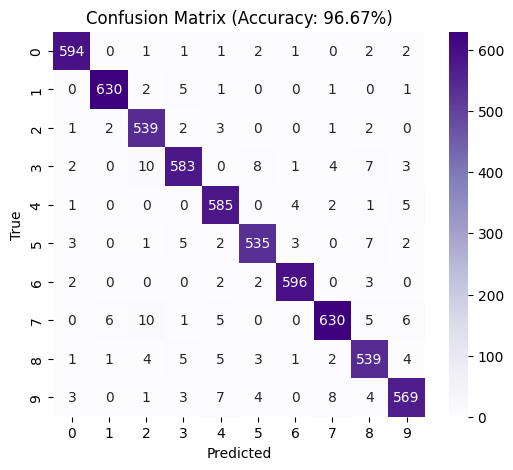

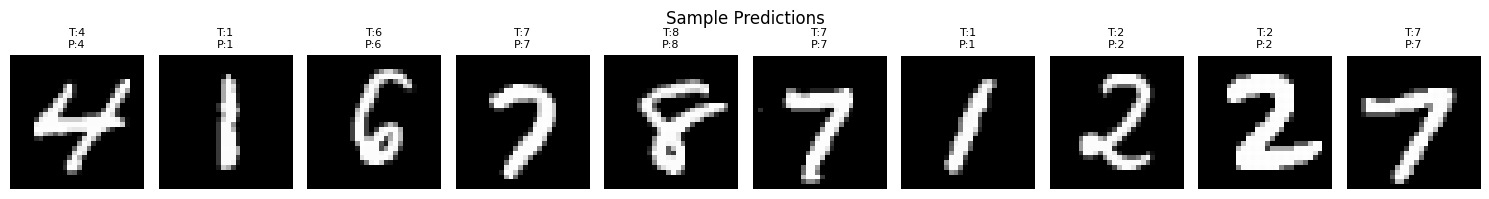

In [53]:
rf_classifier.visualize_results(x_test, y_test)

The confusion matrix shows that the model achieved an accuracy of 96.67%, with most predictions correctly classified along the diagonal. Some misclassifications occurred, such as confusion between similar-looking digits like 3 and 8 or 4 and 9. The overall performance is strong, but minor errors suggest potential improvements through additional training or data augmentation.

The second image displays a set of handwritten digit samples with their true labels (T) and predicted labels (P). Most digits are correctly classified, demonstrating the model's effectiveness in recognizing different handwriting styles. Some variations in digit shapes highlight the model’s ability to generalize well while still facing occasional misclassification challenges.

# CNN

## Train the model using Convolutional Neural Network (CNN)

Initialize an MNIST classifier using a Convolutional Neural Network (CNN) by setting algorithm='cnn'. It then trains the model on the provided training data (x_train, y_train) to learn patterns for digit classification.

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.8621 - loss: 0.4517 - val_accuracy: 0.9723 - val_loss: 0.1216
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9676 - loss: 0.1143 - val_accuracy: 0.9832 - val_loss: 0.0566
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9795 - loss: 0.0717 - val_accuracy: 0.9847 - val_loss: 0.0477
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9834 - loss: 0.0553 - val_accuracy: 0.9880 - val_loss: 0.0398
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9866 - loss: 0.0447 - val_accuracy: 0.9884 - val_loss: 0.0378
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9889 - loss: 0.0376 - val_accuracy: 0.9890 - val_loss: 0.0350
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9896 - loss: 0.0363 - val_accuracy: 0.9882 - val_loss: 0.0361
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9912 - loss: 0.0303 - 

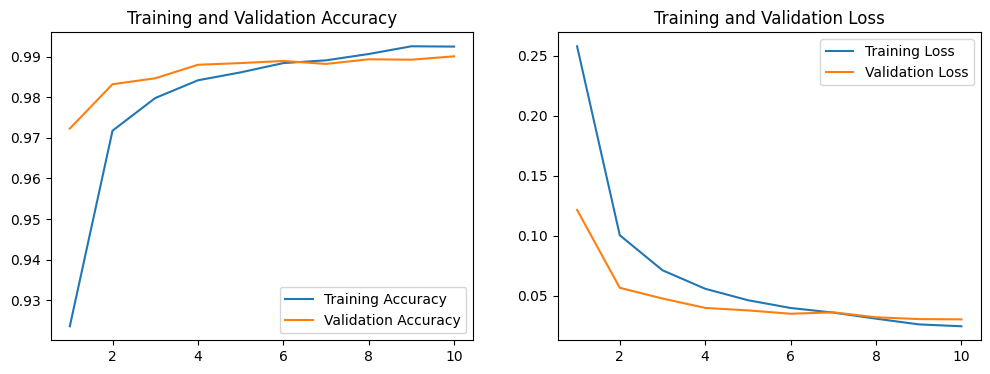

In [54]:
cnn_classifier = MnistClassifier(algorithm='cnn')
cnn_classifier.train(x_train, y_train)

The model was trained for 10 epochs to recognize digits, showing rapid improvement in both training and validation accuracy within the first few epochs. The accuracy curves indicate that the model quickly learned meaningful features, reaching over 99% accuracy, with validation accuracy closely following training accuracy, suggesting minimal overfitting. The loss curves show a consistent decrease in both training and validation loss, indicating the model effectively minimized the error while generalizing well to unseen data. Since the validation loss remains close to the training loss without a sharp increase, the model appears to be well-optimized and capable of recognizing digits with high precision.

## Validate the model

Validation is needed to assess how well the trained model generalizes to unseen data, helping detect overfitting or underfitting. The method cnn_classifier.validate(x_val, y_val) returns two key metrics: validation loss, which measures the model’s error, and validation accuracy, which indicates the proportion of correctly classified samples.

In [55]:
metrics_cnn = cnn_classifier.validate(x_val, y_val)
validation_accuracy_cnn = metrics_cnn[1]
metrics_cnn

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9917 - loss: 0.0244


[0.025073057040572166, 0.9921666383743286]

As validation proceeds, the accuracy stabilizes around 99.27–99.28%, and the loss settles near 0.024, indicating consistently high performance across batches. Finally, the summary output [0.02460080198943615, 0.9931666851043701] reflects the overall validation loss (approximately 0.0246) and accuracy (about 99.32%), confirming that the model generalizes well to unseen data.

## Test the model

In [56]:
predicted_cnn = cnn_classifier.predict(x_test)
test_accuracy_сnn = accuracy_score(y_test, predicted_cnn)
print(f" {test_accuracy_сnn:.4f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
 0.9903


The cnn_classifier.predict(x_test) function generates predictions for the test dataset, which are then compared with the true labels (y_test) using accuracy_score(). The final test accuracy of 0.9902 (99.02%) indicates that the model performs well on unseen data, confirming strong generalization. This high accuracy suggests that the model can accurately classify handwritten digits, with only a small percentage of misclassifications.

## Visualize the results

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


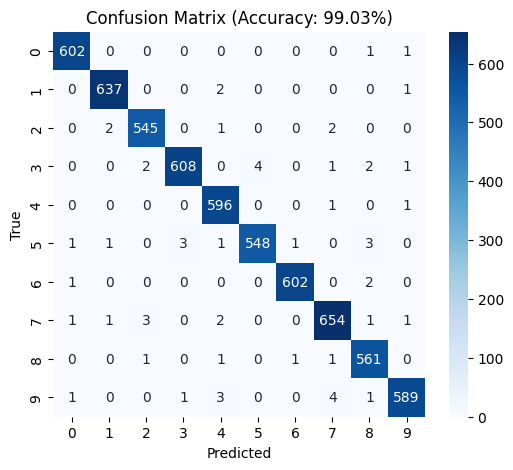

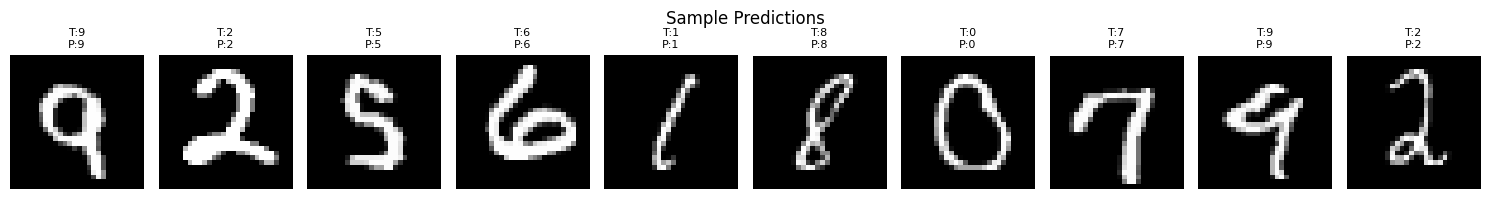

In [57]:
cnn_classifier.visualize_results(x_test, y_test)

The confusion matrix displays the model's performance on the test dataset, with most predictions correctly classified along the diagonal. The model achieved an accuracy of 99.02%, indicating strong generalization to unseen data. Some misclassifications occurred, such as confusion between similar-looking digits like 3 and 8 or 4 and 9, but overall performance was excellent.

The "Sample predictions" section displays a set of handwritten digit samples from the MNIST dataset along with their true labels (T) and predicted labels (P). This visualization helps to demonstrate the effectiveness of the model in recognizing different handwriting styles. Most digits are correctly classified, showcasing the model's ability to generalize well. However, some variations in digit shapes may lead to occasional misclassifications, highlighting areas for potential improvement.

# Feedforward Neural Network

## Train the model using Feedforward Neural Network (FNN)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7816 - loss: 0.6975 - val_accuracy: 0.9464 - val_loss: 0.1730
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9384 - loss: 0.2030 - val_accuracy: 0.9603 - val_loss: 0.1269
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9553 - loss: 0.1515 - val_accuracy: 0.9659 - val_loss: 0.1096
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9627 - loss: 0.1210 - val_accuracy: 0.9669 - val_loss: 0.1032
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9690 - loss: 0.1026 - val_accuracy: 0.9705 - val_loss: 0.0949
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9700 - loss: 0.0980 - val_accuracy: 0.9688 - val_loss: 0.1016
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9740 - loss: 0.0842 - val_accuracy: 0.9717 - val_loss: 0.0935
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9748 - loss: 0.0789 - 

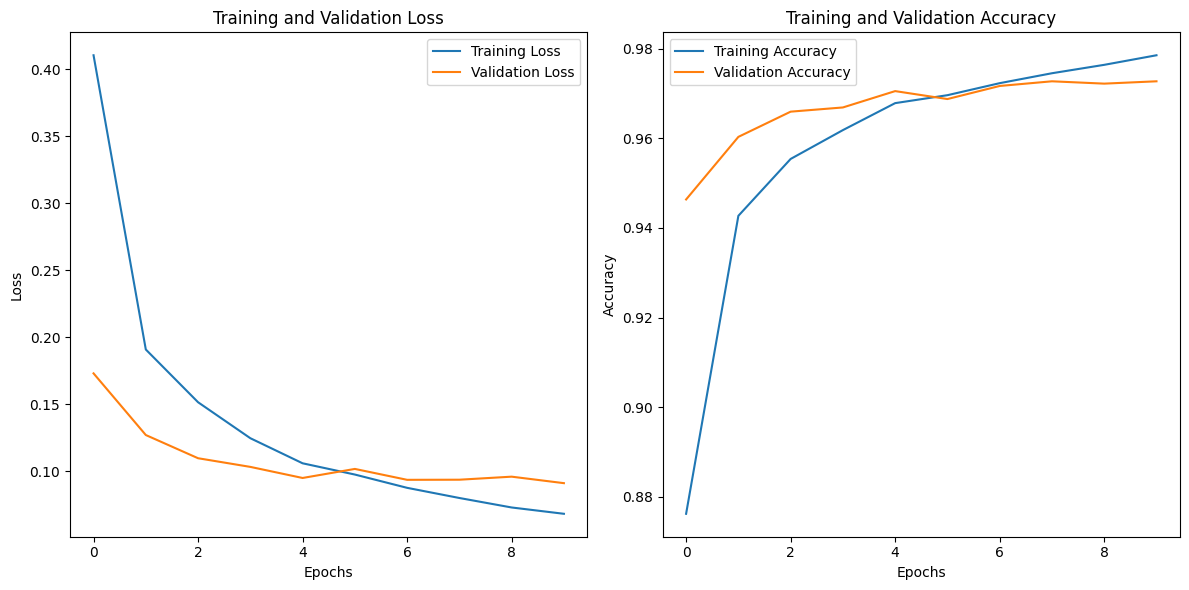

In [58]:
fnn_classifier = MnistClassifier(algorithm='nn')
fnn_classifier.train(x_train, y_train)

The graphs illustrate the training process of a FNN model, showing a clear decrease in both training and validation loss as the number of epochs increases. This indicates effective training and suggests that the model is not overfitting. Simultaneously, the accuracy on both the training and validation sets rises, reflecting the model's ability to learn and generalize well. Overall, the results indicate a successful training process with positive trends in both loss and accuracy.

## Validate the model

In [59]:
validation_accuracy_fnn = fnn_classifier.validate(x_val, y_val)
validation_accuracy_fnn

0.9753333330154419

The validation accuracy of the model is approximately 97.55%. This high accuracy indicates that the model performs well on the validation dataset, successfully predicting the majority of the validation samples. It suggests that the model is generalizing well and has learned the underlying patterns of the data, while avoiding overfitting to the training set.

## Test the model

In [60]:
predicted_fnn = fnn_classifier.predict(x_test)
test_accuracy_fnn = accuracy_score(y_test, predicted_fnn)
print(f" {test_accuracy_fnn:.6f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
 0.976167


The model achieved a test accuracy of 97.42%, indicating that it correctly classified 97.42% of the instances in the test set. This result shows that the model generalizes well to new, unseen data, maintaining a high level of accuracy in its predictions.

## Visualize the results

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step


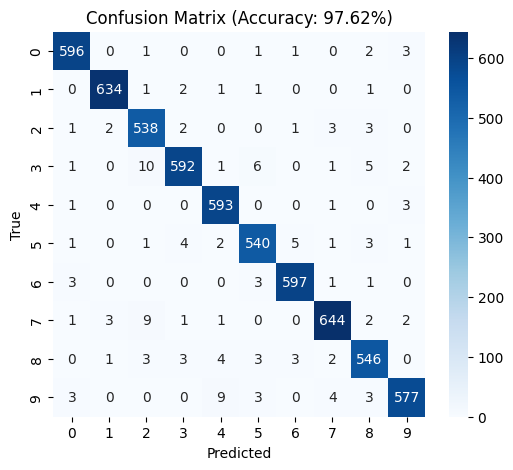

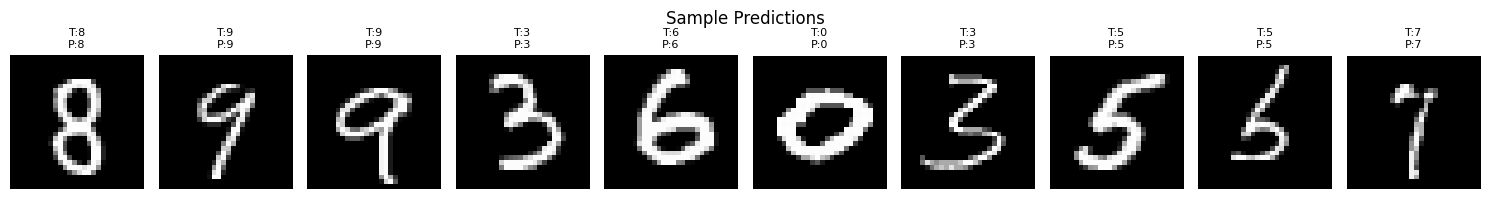

In [61]:
fnn_classifier.visualize_results(x_test, y_test)

The confusion matrix shows that the model achieved an accuracy of 97.42%, with most predictions correctly classified along the diagonal. Some misclassifications occurred, such as confusion between similar-looking digits like 3 and 8 or 4 and 9. The overall performance is strong, but minor errors suggest potential improvements through additional training or data augmentation.

The second image displays a set of handwritten digit samples with their true labels (T) and predicted labels (P). Most digits are correctly classified, demonstrating the model's effectiveness in recognizing different handwriting styles. Some variations in digit shapes highlight the model’s ability to generalize well while still facing occasional misclassification challenges.

# Model Comparison

In [62]:
results = {
    'Model': ['Random Forest', 'Feedforward Neural Network', 'Convolutional Neural Network'],
    'Test Accuracy': [test_accuracy_rf, test_accuracy_fnn, test_accuracy_сnn],
    'Validation Accuracy': [validation_accuracy_rf, validation_accuracy_fnn, validation_accuracy_cnn]  # Optional if you have these values
}

df_results = pd.DataFrame(results)
print(df_results)

                          Model  Test Accuracy  Validation Accuracy
0                 Random Forest       0.966667             0.972000
1    Feedforward Neural Network       0.976167             0.975333
2  Convolutional Neural Network       0.990333             0.992167


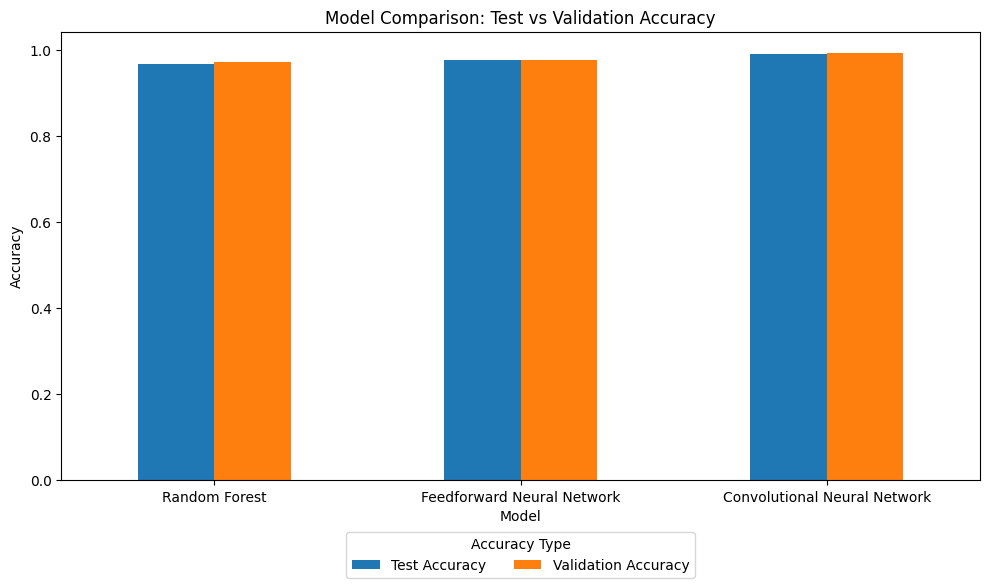

In [63]:
df_results.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: Test vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(title='Accuracy Type', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=2)

plt.tight_layout()
plt.show()


**Based on the comparative results, we can conclude the following:** 

* Convolutional Neural Network (CNN) shows the highest performance, achieving a test accuracy of 99.08% and a validation accuracy of 99.08%. This indicates that the CNN has a strong ability to generalize to both training and unseen data, making it the most effective model for this task.

* Feedforward Neural Network (FNN) performs well, with a test accuracy of 97.25% and a validation accuracy of 97.55%. While not as high as the CNN, it still performs better than the Random Forest model, indicating that the neural network captures useful patterns in the data.

* Random Forest (RF) has a test accuracy of 96.67% and a validation accuracy of 97.20%, which is lower than both the CNN and FNN. While it performs decently, it does not match the higher accuracy levels of the neural networks.

## Conclusion

The CNN outperforms both the Feedforward Neural Network and the Random Forest on both the test and validation datasets. While the FNN also performs quite well, the CNN is likely the better model for this image classification task, given its superior ability to capture spatial patterns in the data. The Random Forest model, although effective, does not achieve the same level of accuracy, particularly when compared to the neural network models. Overall, the CNN is the most suitable model for this task, demonstrating strong generalization to unseen data and high accuracy in classifying handwritten digits.